# Import Libraries and Data

In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error

In [76]:
import os 

In [77]:
df = pd.read_csv("audi.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [78]:
# df = pd.DataFrame()

# for csv_file in os.listdir(): 
#     brand, extension = csv_file.split(".")
#     if extension == "csv": 
#         df_per_car = pd.read_csv(csv_file)
#         df_per_car["brand"] = brand 
#         print(len(df_per_car.columns), df_per_car.columns)
#         df = df.append(df_per_car, ignore_index=True)

# Data Understanding and Data Cleaning

In [79]:
df.shape

(10668, 9)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [81]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [82]:
# remove whitespace in model name
df['model'] = df['model'].str.strip()

In [83]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [84]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [85]:
# change price from usd to sek
df['price'] = df['price']*8.61
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,107625.0,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,142065.0,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,94710.0,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,144648.0,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,148953.0,Manual,1998,Petrol,145,49.6,1.0


# Maching Learning

In [86]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,107625.0,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,142065.0,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,94710.0,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,144648.0,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,148953.0,Manual,1998,Petrol,145,49.6,1.0


## Encode

In [87]:
encoder = LabelEncoder()
df['model'] = encoder.fit_transform(df['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping

{0: 'A1',
 1: 'A2',
 2: 'A3',
 3: 'A4',
 4: 'A5',
 5: 'A6',
 6: 'A7',
 7: 'A8',
 8: 'Q2',
 9: 'Q3',
 10: 'Q5',
 11: 'Q7',
 12: 'Q8',
 13: 'R8',
 14: 'RS3',
 15: 'RS4',
 16: 'RS5',
 17: 'RS6',
 18: 'RS7',
 19: 'S3',
 20: 'S4',
 21: 'S5',
 22: 'S8',
 23: 'SQ5',
 24: 'SQ7',
 25: 'TT'}

In [88]:
df['transmission'] = encoder.fit_transform(df['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [89]:
df['fuelType'] = encoder.fit_transform(df['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Hybrid', 2: 'Petrol'}

## Modeling

In [90]:
x = df.drop('price', axis=1)
y = df['price']

In [91]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

#showing data
print('x \n' , X[:10])
print('y \n' , y[:10])

x 
 [[0.         0.86956522 0.5        0.04871223 1.         0.25862069
  0.21546635 0.22222222]
 [0.2        0.82608696 0.         0.11208084 0.         0.03448276
  0.2674144  0.31746032]
 [0.         0.82608696 0.5        0.09270927 1.         0.05172414
  0.21546635 0.22222222]
 [0.12       0.86956522 0.         0.0803439  0.         0.25
  0.28571429 0.31746032]
 [0.08       0.95652174 0.5        0.00618268 1.         0.25
  0.18122786 0.15873016]
 [0.         0.82608696 0.         0.09987337 1.         0.05172414
  0.23612751 0.22222222]
 [0.2        0.82608696 0.         0.23773139 0.         0.05172414
  0.25088548 0.31746032]
 [0.12       0.82608696 0.5        0.23276852 0.         0.03448276
  0.30519481 0.31746032]
 [0.08       0.7826087  0.5        0.14275896 1.         0.03448276
  0.24321133 0.22222222]
 [0.         0.82608696 0.5        0.06950486 1.         0.05172414
  0.21546635 0.22222222]]
y 
 0    107625.0
1    142065.0
2     94710.0
3    144648.0
4    148953.0
5  

In [94]:
# import pickle
# scalerfile = 'scaler.sav'
# pickle.dump(scaler, open(scalerfile, 'wb'))

In [92]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [93]:
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)

x_train shape is: (7467, 8)
x_test shape is: (3201, 8)


In [95]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=11, random_state=33)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Random Forest Regressor Train Score is :  0.9772654289245333
Random Forest Regressor Test Score is :  0.9551469643896635
Random Forest Regressor No. of features are :  8
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [126315.70531956 207386.33450442 241939.38130877 231699.50470216
 277781.64762321 242413.57296127 144676.36513938 287887.9103993
 173780.31249559 254648.86508163]


In [96]:
pd.DataFrame({"REAL":y_test[:10], "PRED": y_pred[:10]})

,REAL,PRED
2049,129132.78,126315.705320
5609,188989.50,207386.334504
7638,249603.90,241939.381309
1603,219460.29,231699.504702
5953,266479.50,277781.647623
6928,260874.39,242413.572961
1712,124827.78,144676.365139
7642,275520.00,287887.910399
1180,172122.51,173780.312496
5867,258213.90,254648.865082


In [97]:
x_test

array([[0.12      , 0.7826087 , 0.5       , ..., 0.25      , 0.21546635,
        0.31746032],
       [0.12      , 0.95652174, 0.5       , ..., 0.25      , 0.11983471,
        0.31746032],
       [0.16      , 0.95652174, 0.        , ..., 0.25      , 0.12337662,
        0.31746032],
       ...,
       [0.16      , 0.73913043, 0.        , ..., 0.21551724, 0.24321133,
        0.31746032],
       [0.32      , 0.86956522, 1.        , ..., 0.25862069, 0.20897285,
        0.22222222],
       [0.44      , 0.95652174, 1.        , ..., 0.25      , 0.08205431,
        0.47619048]])

In [98]:
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  451040078.39236134


In [99]:
MSEValue ** 0.5

21237.704169527395

In [ ]:
x_coba = [[0.2 , 0.82608696 ,0.,         0.11208084, 0.,         0.03448276
,  0.2674144 , 0.31746032]]
y_pred2 = RandomForestRegressorModel.predict(x_coba)
y_pred2

In [49]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("regressor.pkl","wb")
pickle.dump(RandomForestRegressorModel, pickle_out)
pickle_out.close()

In [25]:
df["price"].max()

145000

In [26]:
import seaborn as sns 

/home/tryan/miniconda2/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


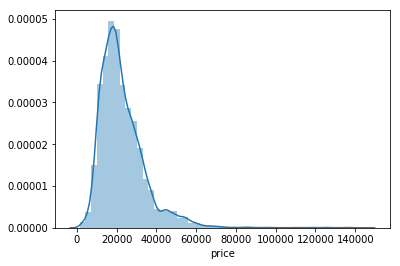

In [27]:
sns.distplot(df["price"])

In [28]:
x_train.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
4066,7,2019,0,5000,0,145,50.4,3.0
4658,4,2020,2,5137,0,145,46.3,2.0
2149,2,2015,1,41683,2,20,58.9,1.4
9729,4,2011,1,85000,0,200,48.7,2.0
4406,5,2019,2,8000,0,145,50.4,2.0


In [29]:
pd.read_csv("data/audi.csv")

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [50]:
from math import pi

'{0:.2f}'.format(pi)

'3.14'

In [53]:
{str(year): str(year) for year in range(1997, 2020+1, 1)}

{'1997': '1997',
 '1998': '1998',
 '1999': '1999',
 '2000': '2000',
 '2001': '2001',
 '2002': '2002',
 '2003': '2003',
 '2004': '2004',
 '2005': '2005',
 '2006': '2006',
 '2007': '2007',
 '2008': '2008',
 '2009': '2009',
 '2010': '2010',
 '2011': '2011',
 '2012': '2012',
 '2013': '2013',
 '2014': '2014',
 '2015': '2015',
 '2016': '2016',
 '2017': '2017',
 '2018': '2018',
 '2019': '2019',
 '2020': '2020'}

In [52]:
2020 - 1997

23

In [55]:
580 // 5

116

In [57]:
(6.3)//5

1.0

In [ ]:
Output("price-prediction-values", "children"), 
Output("year-slider-value", "children"), 
Output("mileage-slider-value", "children"), 
Output("tax-slider-value", "children"), 
Output("mpg-slider-value", "children"), 
Output("engineSize-slider-value", "children"), 
Output("model-dropdown-value", "children"), 
Output("fuelType-dropdown-value", "children"), 
Output("transmission-dropdown-value", "children"), 

In [58]:
import pandas as pd 